In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("../datasets/final/WIPRO.csv")

In [3]:
df.shape

(104, 83)

In [4]:
df.drop(df.columns[0], axis=1, inplace=True)

In [5]:
df.set_index(df.columns[0], inplace=True)

In [6]:
# df = df.T

In [7]:
df

,Jun 4,Sep 4,Dec 4,Mar 5,Jun 5,Sep 5,Dec 5,Mar 6,Jun 6,Sep 6,...,Mar 22,Jun 22,Sep 22,Dec 22,Mar 23,Jun 23,Sep 23,Dec 23,Mar 24,Jun 24
Mar 4,,,,,,,,,,,,,,,,,,,,,
51.045002,59.861252,67.139999,84.240005,75.481880,86.208755,83.576256,104.253754,125.932503,115.503754,118.102509,...,591.900024,416.049988,394.25,392.75,365.25,389.149994,406.049988,471.299988,480.100006,514.849976
46.550000,46.550000,46.550000,46.550000,140.710000,140.710000,140.710000,140.710000,285.150000,285.150000,285.150000,...,1096.400000,1096.400000,1096.40,1096.40,1097.60,1097.600000,1097.600000,1097.600000,1045.000000,1045.000000
46.550000,46.550000,46.550000,46.550000,140.710000,140.710000,140.710000,140.710000,285.150000,285.150000,285.150000,...,1096.400000,1096.400000,1096.40,1096.40,1097.60,1097.600000,1097.600000,1097.600000,1045.000000,1045.000000
3461.040000,3461.040000,3461.040000,3461.040000,4751.730000,4751.730000,4751.730000,4751.730000,6135.300000,6135.300000,6135.300000,...,53254.300000,53254.300000,53254.30,53254.30,61101.50,61101.500000,61101.500000,61101.500000,56736.900000,56736.900000
3461.040000,3461.040000,3461.040000,3461.040000,4751.730000,4751.730000,4751.730000,4751.730000,6135.300000,6135.300000,6135.300000,...,53254.300000,53254.300000,53254.30,53254.30,61101.50,61101.500000,61101.500000,61101.500000,56736.900000,56736.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341.161765,2341.161765,2341.161765,2341.161765,2341.161765,2341.161765,2341.161765,2341.161765,2341.161765,2341.161765,2341.161765,...,6089.500000,2943.700000,2955.60,3227.10,3142.50,3421.100000,2848.100000,2803.500000,3344.800000,3280.900000
74.400000,59.800000,66.700000,70.000000,65.700000,62.100000,82.400000,85.100000,90.400000,98.000000,91.800000,...,610.700000,727.100000,672.70,814.00,878.40,833.300000,786.800000,780.600000,898.200000,906.300000
1829.364706,1829.364706,1829.364706,1829.364706,1829.364706,1829.364706,1829.364706,1829.364706,1829.364706,1829.364706,1829.364706,...,5478.800000,2216.600000,2282.90,2413.10,2264.10,2587.800000,2061.300000,2022.900000,2446.600000,2374.600000


In [8]:
closing_prices = df.iloc[0, 1:].values.astype(float)

scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices.reshape(-1, 1))

In [9]:
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i+look_back])
        y.append(data[i+look_back])
    return np.array(X), np.array(y)

look_back = 9
X, y = create_sequences(closing_prices_scaled, look_back)

In [10]:
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [12]:
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50, return_sequences=False)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
2/2 [==============================] - 13s 2s/step - loss: 0.0447 - val_loss: 0.3024
Epoch 2/50
2/2 [==============================] - 0s 45ms/step - loss: 0.0167 - val_loss: 0.1517
Epoch 3/50
2/2 [==============================] - 0s 37ms/step - loss: 0.0044 - val_loss: 0.0711
Epoch 4/50
2/2 [==============================] - 0s 35ms/step - loss: 0.0071 - val_loss: 0.0542
Epoch 5/50
2/2 [==============================] - 0s 37ms/step - loss: 0.0101 - val_loss: 0.0589
Epoch 6/50
2/2 [==============================] - 0s 37ms/step - loss: 0.0066 - val_loss: 0.0763
Epoch 7/50
2/2 [==============================] - 0s 39ms/step - loss: 0.0038 - val_loss: 0.1010
Epoch 8/50
2/2 [==============================] - 0s 44ms/step - loss: 0.0034 - val_loss: 0.1209
Epoch 9/50
2/2 [==============================] - 0s 43ms/step - loss: 0.0045 - val_loss: 0.1296
Epoch 10/50
2/2 [==============================] - 0s 41ms/step - loss: 0.0051 - val_loss: 0.1251
Epoch 11/50
2/2 [=============

In [14]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

1/1 [==============================] - 0s 32ms/step


In [15]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [16]:
y_train_scaled = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

In [17]:
full_closing_prices = scaler.inverse_transform(closing_prices_scaled)
all_predictions = np.concatenate([train_predictions, test_predictions], axis=0)

In [18]:
future_predictions = []
last_sequence = closing_prices_scaled[-look_back:]

In [19]:
num_future_predictions = 4
for _ in range(num_future_predictions):
    next_pred = model.predict(last_sequence.reshape(1, look_back, 1))
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[1:], next_pred).reshape(look_back, 1)

1/1 [==============================] - 0s 31ms/step


In [20]:
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [21]:
extended_predictions = np.concatenate([all_predictions, future_predictions])

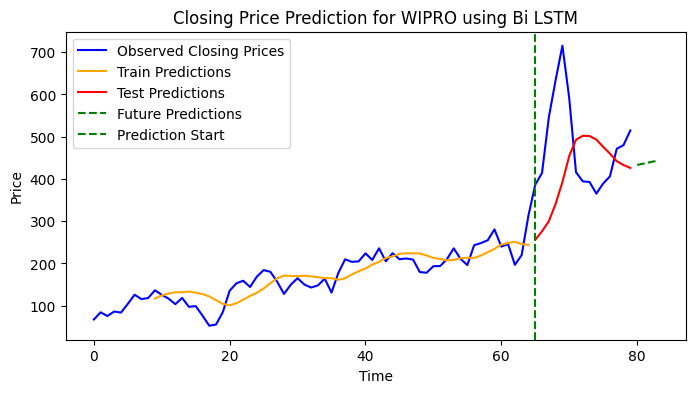

In [22]:
plt.figure(figsize=(8,4))
plt.plot(full_closing_prices, color='blue', label='Observed Closing Prices')
plt.plot(np.arange(look_back, look_back + len(train_predictions)), train_predictions, color='orange', label='Train Predictions')
plt.plot(np.arange(look_back + len(train_predictions), look_back + len(train_predictions) + len(test_predictions)), test_predictions, color='red', label='Test Predictions')
plt.plot(np.arange(len(full_closing_prices), len(full_closing_prices) + num_future_predictions), future_predictions, color='green', linestyle='--', label='Future Predictions')
plt.axvline(x=len(full_closing_prices) - len(test_predictions), color='green', linestyle='--', label='Prediction Start')
plt.title('Closing Price Prediction for WIPRO using Bi LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [23]:
mae = mean_absolute_error(y_test_scaled, test_predictions)
mse = mean_squared_error(y_test_scaled, test_predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_scaled - test_predictions) / y_test_scaled)) * 100

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Absolute Error (MAE): 133.01147257486977
Mean Squared Error (MSE): 24848.888162637686
Root Mean Squared Error (RMSE): 157.63530113092588
Mean Absolute Percentage Error (MAPE): 26.94259413870302%
